## SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
def acc_loss_graph(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()
  plt.title('Training and validation accuracy')

  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## GET AND ORGANIZE DATA

The GTSRB dataset was used for training traffic sign classification model:

Link: [GTSRB - German Traffic Sign Recognition Benchmark](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

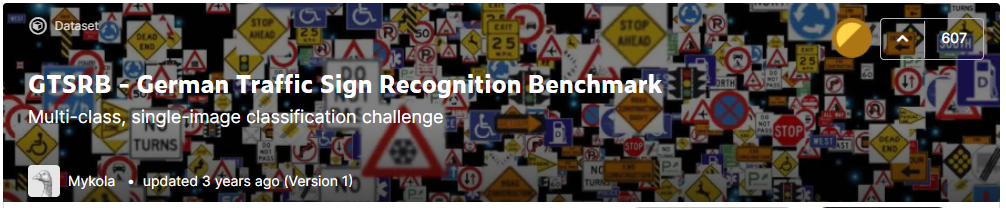

In [ ]:
!unzip -q '/content/gdrive/MyDrive/Traffic_sign_classification/GTSRB.zip' -d /content/Data/

## MAIN PROCESS



### Build models:


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#### Model 1:

In [ ]:
def model_maker():
  model = tf.keras.models.Sequential([
      Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
      Conv2D(32, (3,3), activation='relu', padding='same'),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu', padding='same'),
      Conv2D(64, (3,3), activation='relu', padding='same'),
      layers.Dropout(0.3),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu', padding='same'),
      layers.Dropout(0.3),
      MaxPooling2D(2,2),
      Conv2D(256, (3,3), activation='relu', padding='same'),
      layers.Dropout(0.3),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(43, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics = ['accuracy'])
  return model

In [ ]:
model = model_maker()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 37, 37, 64)      

#### Model 2:

In [ ]:
def model2_maker():
  model = tf.keras.models.Sequential([
      Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
      Conv2D(32, (3,3), activation='relu', padding='same'),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu', padding='same'),
      Conv2D(64, (3,3), activation='relu', padding='same'),
      layers.Dropout(0.3),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu', padding='same'),
      layers.Dropout(0.3),
      MaxPooling2D(2,2),
      Conv2D(256, (3,3), activation='relu', padding='same'),
      Conv2D(256, (3,3), activation='relu', padding='same'),
      layers.Dropout(0.3),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(43, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  
                metrics = ['accuracy'])
  return model

In [ ]:
model_2 = model2_maker()
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 37, 37, 64)      

### Prepare ImageDataGenerator

In [ ]:
import pandas as pd

test_df = pd.read_csv('/content/Data/Test.csv')

In [ ]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
test_df['ClassId'] = test_df['ClassId'].astype('str')

In [ ]:
test_df['Filename'] = test_df['Path'].str.split('/', expand=True)[1]

In [ ]:
train_df = pd.read_csv('/content/Data/Train.csv')
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
train_df['ClassId'] = train_df['ClassId'].astype('str')

In [ ]:
def generator_maker():
  # All images will be rescaled by 1./255.
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     shear_range=0.5,
                                     zoom_range=0.2)
  test_datagen  = ImageDataGenerator(rescale=1./255)

  train_generator =  train_datagen.flow_from_dataframe(dataframe = train_df,
                                                           directory = '/content/Data',
                                                           x_col = 'Path', 
                                                           y_col = 'ClassId',
                                                          batch_size=32,
                                                          class_mode  = 'sparse',  
                                                          target_size = (150, 150))    

  validation_generator =  test_datagen.flow_from_dataframe(dataframe = test_df,
                                                           directory = '/content/Data/Test',
                                                           x_col = 'Filename', 
                                                           y_col = 'ClassId',
                                                          batch_size=32,
                                                          class_mode  = 'sparse',  
                                                          target_size = (150, 150))
  return train_generator, validation_generator

Check train set and test set:

In [ ]:
train_generator, validation_generator = generator_maker()

Found 39209 validated image filenames belonging to 43 classes.
Found 12630 validated image filenames belonging to 43 classes.


### Train

Training model 1:

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    verbose=1)

Epoch 1/10
1226/1226 [==============================] - 186s 152ms/step - loss: 0.9973 - accuracy: 0.6978 - val_loss: 0.3108 - val_accuracy: 0.9265
Epoch 2/10
1226/1226 [==============================] - 186s 151ms/step - loss: 0.1586 - accuracy: 0.9509 - val_loss: 0.1881 - val_accuracy: 0.9531
Epoch 3/10
1226/1226 [==============================] - 186s 152ms/step - loss: 0.1077 - accuracy: 0.9671 - val_loss: 0.1564 - val_accuracy: 0.9565
Epoch 4/10
1226/1226 [==============================] - 185s 151ms/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.1200 - val_accuracy: 0.9678
Epoch 5/10
1226/1226 [==============================] - 185s 151ms/step - loss: 0.0597 - accuracy: 0.9820 - val_loss: 0.1875 - val_accuracy: 0.9553
Epoch 6/10
1226/1226 [==============================] - 185s 151ms/step - loss: 0.0541 - accuracy: 0.9841 - val_loss: 0.1434 - val_accuracy: 0.9637
Epoch 7/10
1226/1226 [==============================] - 185s 151ms/step - loss: 0.0548 - accuracy: 0.9835 - val_

Evaluating model:

In [ ]:
model.evaluate(validation_generator)

395/395 [==============================] - 7s 19ms/step - loss: 0.1172 - accuracy: 0.9688


[0.11724935472011566, 0.9688044190406799]

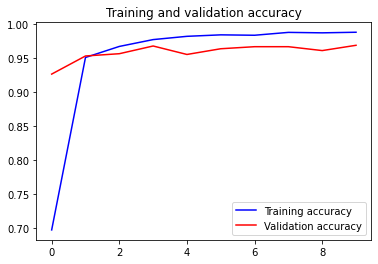

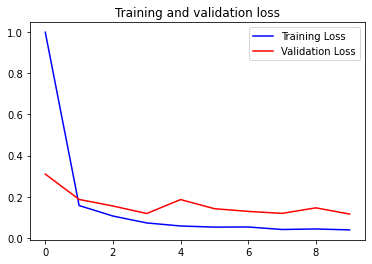

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc_loss_graph(history)


#### Save first model

In [ ]:
model.save('/content/gdrive/MyDrive/Traffic_sign_classification/traffic_sign_model1.h5') 

### Fine tune 

#### Early Stopping + Model Checkpoint for model 2

In [ ]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10,
    verbose=1)

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/gdrive/MyDrive/Traffic_sign_classification/model_1_checkpoint.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

In [ ]:
history = model_2.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=60,
                    callbacks=[earlystopping_callback, checkpoint_callback],
                    verbose=1)

Epoch 1/60
1226/1226 [==============================] - 188s 153ms/step - loss: 1.3810 - accuracy: 0.5881 - val_loss: 0.3930 - val_accuracy: 0.8824

Epoch 00001: val_loss improved from inf to 0.39302, saving model to /content/gdrive/MyDrive/Traffic_sign_classification/model_1_checkpoint.h5
Epoch 2/60
1226/1226 [==============================] - 187s 152ms/step - loss: 0.2096 - accuracy: 0.9324 - val_loss: 0.1874 - val_accuracy: 0.9456

Epoch 00002: val_loss improved from 0.39302 to 0.18738, saving model to /content/gdrive/MyDrive/Traffic_sign_classification/model_1_checkpoint.h5
Epoch 3/60
1226/1226 [==============================] - 187s 152ms/step - loss: 0.1233 - accuracy: 0.9616 - val_loss: 0.1651 - val_accuracy: 0.9557

Epoch 00003: val_loss improved from 0.18738 to 0.16505, saving model to /content/gdrive/MyDrive/Traffic_sign_classification/model_1_checkpoint.h5
Epoch 4/60
1226/1226 [==============================] - 186s 152ms/step - loss: 0.0920 - accuracy: 0.9721 - val_loss: 0

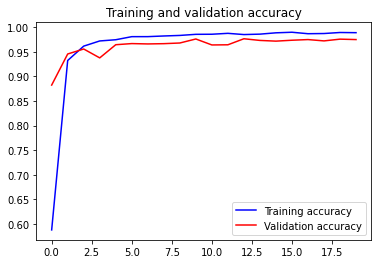

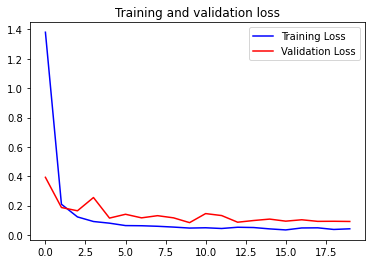

In [ ]:
acc_loss_graph(history)

###**Restore best model from checkpoint**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Traffic_sign_classification/model_1_checkpoint.h5')

# Show the model architecture
restored_model.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Re-evaluate the model
loss, acc = restored_model.evaluate(validation_generator)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 37, 37, 64)      

### Predict a real image


In [ ]:
meta = pd.read_csv('/content/Data/Meta.csv')
meta['ClassId'] = meta['ClassId'].astype('str')

In [ ]:
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

def check_image_prediction():
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

  img        = image.load_img(img_path, target_size=(150, 150))
  img_array  = image.img_to_array(img)
  img_array  = np.expand_dims(img_array, axis=0)

  prediction = restored_model.predict(img_array)

  for key, value in validation_generator.class_indices.items():
    if value == prediction[0].argmax():
      pred = key
  img_true_path = '/content/Data/' + meta.loc[meta['ClassId'] == pred, 'Path'].item()

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('Prediction: ' + pred.upper())
  plt.axis('off')
  plt.grid(b=None)

  plt.subplot(1,2,2)
  img_true = mpimg.imread(img_true_path)
  plt.imshow(img_true)
  plt.title('Prediction item: ')
  plt.axis('off')
  plt.grid(b=None)
  plt.show()

In [ ]:
check_image_prediction()